Алиева Хадижат ПИ20-1. Лабораторная работа 0.4. Визуализация данных с использованием библиотек matplotlib и seaborn


In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

0. Загрузите датасет для предсказани цены квартиры в зависимости от ряда признаков.

In [4]:
df = pd.read_csv("train.csv")
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


1. Постройте круговую диаграмму для признака Rooms, иллюстрирующую количество квартир в процентах в зависимости от количества комнат. Сделайте сектор с наибольшим числом квартир выдвинутым.

(-1.2181878683243081,
 1.1056279948348602,
 -1.1531958803075486,
 1.1222217105630385)

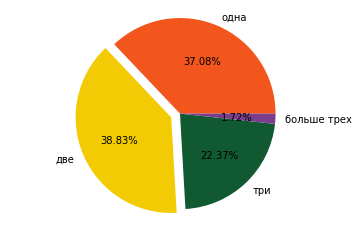

In [13]:
one = df[df['Rooms']==1].shape[0]
two = df[df['Rooms']==2].shape[0]
three = df[df['Rooms']==3].shape[0]
more = df[df['Rooms']>3].shape[0]

vals = [one, two, three, more]
labels = ['одна', 'две', 'три', 'больше трех']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, explode = [0, 0.1, 0, 0], colors=['#F2561D', '#F2CB05', '#115930', '#7B3E8C'],  autopct='%.2f%%')

ax.axis("equal")

2. Постройте гистограмму целевой переменной Price. Оцените визуально, по какой цене продаётся наибольшее количество квартир.

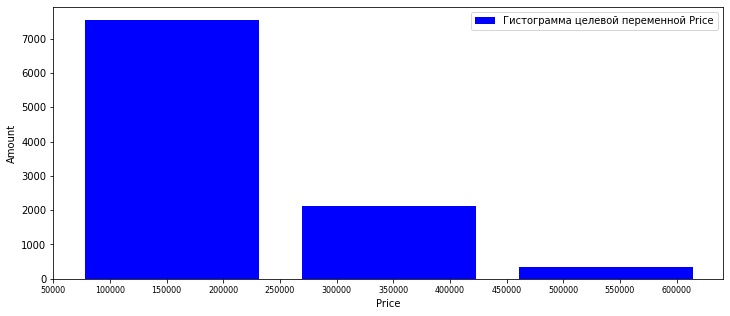

In [5]:
plt.figure(figsize=(12,5))
plt.hist(df['Price'], color='blue', bins=3, rwidth=0.8, label='Гистограмма целевой переменной Price') 
plt.ylabel('Amount')
plt.xlabel('Price')
plt.xticks(np.arange(50000, 650000, 50000), fontsize=8)
plt.legend()
plt.show()

#наибольшее число квартир продается по цене 175000-190000

3. Постройте диаграммы рассеяния для признаков Rooms, Square, HouseFloor, HouseYear в зависимости от целевой переменной Price в одной области fiagure(). Оцените визуально, есть ли среди них такие, на которых разброс точек близок к линейной функции.

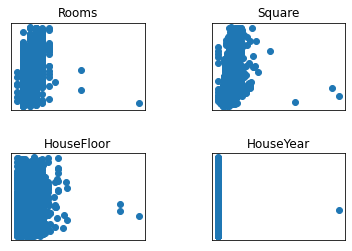

In [ ]:
f = plt.figure()
ax=f.subplots(2,2)
ax[0,0].scatter(df['Rooms'], df['Price'])
ax[0,1].scatter(df['Square'], df['Price'])
ax[1,0].scatter(df['HouseFloor'], df['Price'])
ax[1,1].scatter(df['HouseYear'], df['Price'])
f.subplots_adjust(hspace=0.5,wspace=0.5)
ax[0,0].set(title = 'Rooms', xticks=[], yticks=[])
ax[0,1].set(title = 'Square', xticks=[], yticks=[])
ax[1,0].set(title = 'HouseFloor', xticks=[], yticks=[])
ax[1,1].set(title = 'HouseYear', xticks=[], yticks=[])
plt.show()

#среди графиков нет близких разбросов точек к линейной функции

4. Постройте ядерную оценку плотности целевой переменной Price. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевой переменной Price и признака HouseFloor, затем оцените визуально на каких этажах и по какой цене продаётся основная масса квартир.

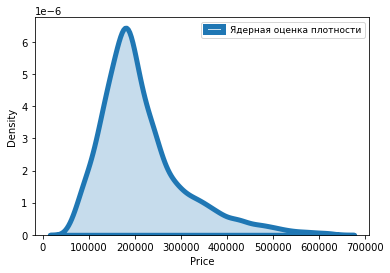

In [ ]:
sns.kdeplot(df['Price'], lw=5, label="Ядерная оценка плотности", shade=True)
plt.legend(fontsize=9)
plt.show()

# полученный график не напоминает нормальное распределение

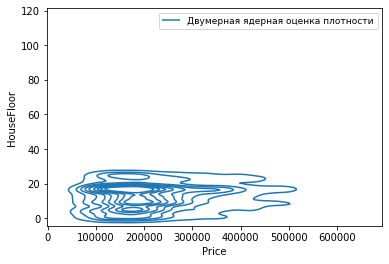

In [ ]:
sns.kdeplot(x=df['Price'],y=df['HouseFloor'], label="Двумерная ядерная оценка плотности")
plt.legend(fontsize=9)
plt.show()

# основная масса квартир продается на 16-19 этажах по цене 120-210 тысяч и на 6-9 этажах по цене 150-200 тысяч

5. Постройте ящиковую диаграмму признака Square. Оцените визуально имеются ли выбросы, и, если да, то начиная с какого размера площади значение признака можно считать выбросом.

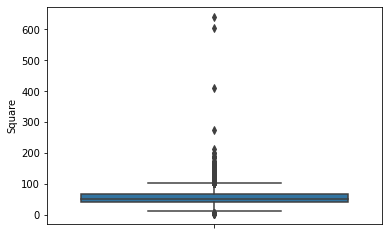

In [ ]:
sns.boxplot(y='Square', data=df, orient="v");

# выбросы имеются, начиная с площади в 100 кв.м. и выше, также имеются выбросы от 0 до ~10 кв.м. 

6. При помощи сетки графиков PairGrid визуализируйте попарные отношения признаков Rooms, Square, HouseFloor, HouseYear, Price следующим образом: на диагонали - гистограммы, под диагональю - ядерные оценки плотности, над диагональю - диаграммы рассеяния. По результатам визуализации сделайте выводы (аналогичные п.2,3,4).

In [ ]:
df_data = df[['Rooms', 'Square', 'HouseFloor', 'HouseYear', 'Price']]

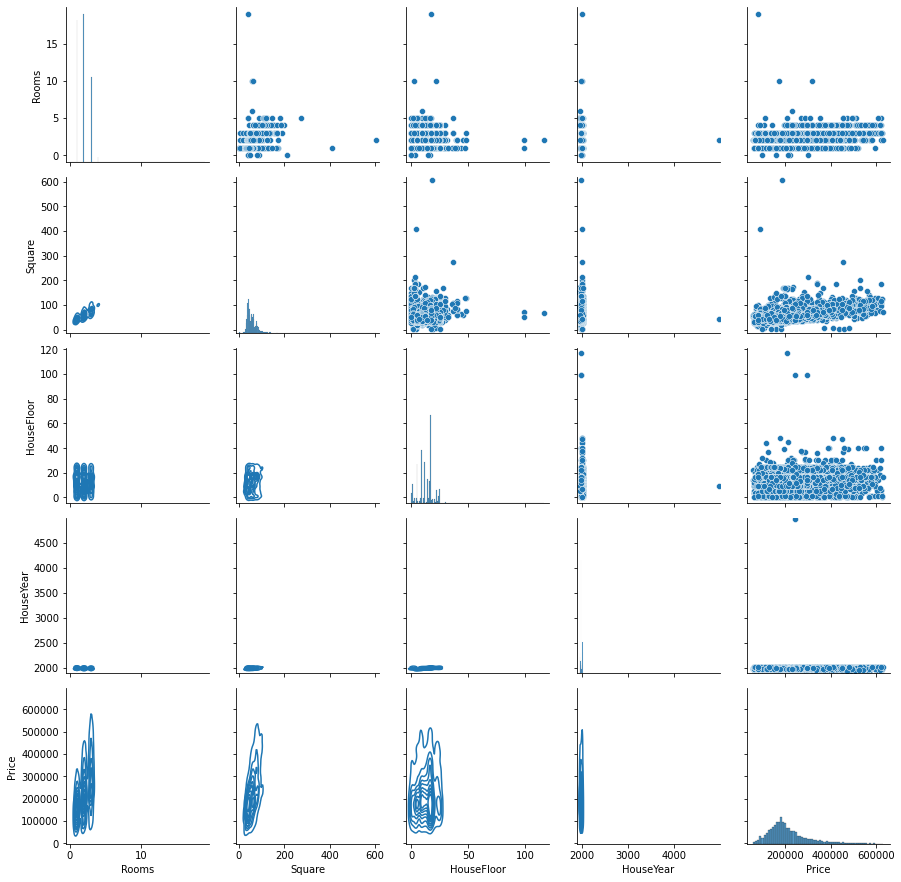

In [ ]:
g = sns.PairGrid(df_data.iloc[:9000, :])
g.map_lower(sns.kdeplot) 
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot); 

7. Постройте тепловую карту матрицы корреляции (df.corr()) признаков Rooms, Square, HouseFloor, HouseYear, Price. По ней определите, какие признаки являются зависимыми (у таких признаков коэффициент корреляции близок к единице).

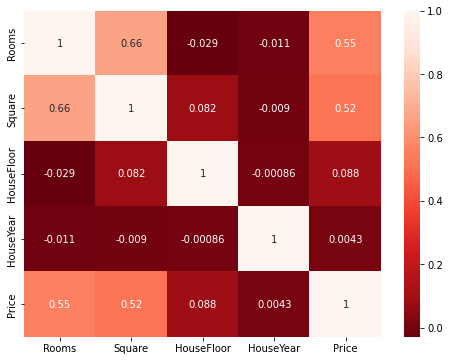

In [ ]:
corr = df_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='Reds_r', annot=True)